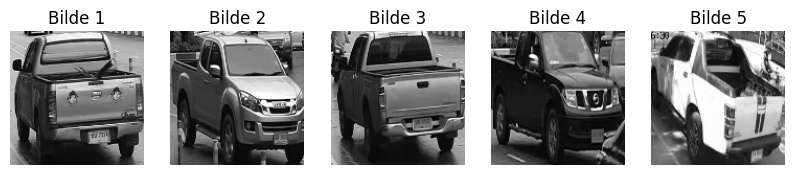

In [ ]:
#PCA

import os
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt


path = "C:\\Kode\\DataDrevet\\Data\\vehicle-type-detection\\r7bthvstxw-1\\pickup"


image_files = glob.glob(os.path.join(path, "*.jpg"))

first_20 = image_files[:20]

grayscale_images = []
size = (128, 128)

for f in image_files[:20]:
    img = cv2.imread(f, cv2.IMREAD_COLOR)          # les fargebilde
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)   # konverter til gråtoner
    gray = cv2.resize(gray, size)                  # alle samme størrelse
    gray = gray.astype(np.float32) / 255.0         # normaliser til [0,1]
    grayscale_images.append(gray)

grayscale_images = np.array(grayscale_images)

plt.figure(figsize=(10, 4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(grayscale_images[i], cmap='gray')
    plt.axis('off')
    plt.title(f"Bilde {i+1}")
plt.show()



In [4]:
#1 Convert the image into a 2D matrix:

X = grayscale_images.reshape(len(grayscale_images), -1)

np.set_printoptions(precision=3, suppress=True)  # penere utskrift
print(X[:3, :10])


[[0.733 0.737 0.722 0.733 0.737 0.725 0.714 0.706 0.698 0.71 ]
 [0.075 0.075 0.055 0.145 0.329 0.38  0.365 0.357 0.435 0.216]
 [0.722 0.376 0.286 0.227 0.341 0.361 0.463 0.471 0.451 0.494]]


In [5]:
#2 compute covariance
mean = np.mean(X, axis=0)      
X_centered = X - mean 

n_samples = X_centered.shape[0]  # antall bilder (20)
cov_matrix = (X_centered.T @ X_centered) / (n_samples - 1)
print("Kovariansmatrise:", cov_matrix.shape)

i, j = 100, 10  # to pikselindekser
print("Kovarians mellom piksel", i, "og", j, "=", cov_matrix[i, j])



Kovariansmatrise: (16384, 16384)
Kovarians mellom piksel 100 og 10 = -0.005032884


In [6]:
#3 egienvalues and vectors
eigvals, eigvecs = np.linalg.eigh(cov_matrix)


In [11]:
#4 sort eigenvalues

print(len(eigvecs))


idx = np.argsort(eigvals)[::-1]
eigvals_sorted = eigvals[idx]

# beregn andel forklart varians
explained_ratio = eigvals_sorted / np.sum(eigvals_sorted)

# skriv ut de første 10
for i in range(10):
    print(f"Komponent {i+1}: egenverdi = {eigvals_sorted[i]:.6f}, "
          f"forklart varians = {explained_ratio[i]*100:.2f}%")

print(f"\nTotal forklart varians med 10 komponenter: {explained_ratio[:10].sum()*100:.2f}%")


16384
Komponent 1: egenverdi = 211.699142, forklart varians = 22.84%
Komponent 2: egenverdi = 140.030838, forklart varians = 15.11%
Komponent 3: egenverdi = 89.405975, forklart varians = 9.65%
Komponent 4: egenverdi = 55.576324, forklart varians = 6.00%
Komponent 5: egenverdi = 45.174000, forklart varians = 4.87%
Komponent 6: egenverdi = 42.992645, forklart varians = 4.64%
Komponent 7: egenverdi = 39.208412, forklart varians = 4.23%
Komponent 8: egenverdi = 35.742901, forklart varians = 3.86%
Komponent 9: egenverdi = 32.485981, forklart varians = 3.51%
Komponent 10: egenverdi = 31.170923, forklart varians = 3.36%

Total forklart varians med 10 komponenter: 78.07%


In [10]:


idx = np.argsort(eigvals)[::-1]
eigvecs_sorted = eigvecs[:, idx]

k = 10
W = eigvecs_sorted[:, :k]   # (D, k)


Z = X_centered @ W          # (N, k)
print("Z shape:", Z.shape)

Z shape: (20, 10)
